In [3]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [5]:
dataset = pandas.read_csv('C:/datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [6]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [7]:
#1. Estadísticos descriptivos

#Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

dataset_numeric = dataset[important_cols].select_dtypes(include=['number'])
for col in dataset_numeric:
    print('Rango', col, ': ', '[', dataset_numeric[col].max() - dataset_numeric[col].min(), ']')

Rango year :  [ 8 ]
Rango pf_identity_legal :  [ 10.0 ]
Rango pf_identity_parental_marriage :  [ 10.0 ]
Rango pf_identity_parental_divorce :  [ 10.0 ]
Rango pf_identity_parental :  [ 10.0 ]
Rango pf_identity_sex_male :  [ 10.0 ]
Rango pf_identity_sex_female :  [ 10.0 ]
Rango pf_identity_sex :  [ 10.0 ]
Rango pf_identity_divorce :  [ 10.0 ]
Rango pf_identity :  [ 10.0 ]
Rango ef_score :  [ 6.31 ]
Rango ef_rank :  [ 161.0 ]
Rango hf_score :  [ 5.360486062 ]
Rango hf_rank :  [ 161.0 ]


In [18]:
#Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda?

dataset_LAC = dataset.loc[dataset['region'] == 'Latin America & the Caribbean']
print('Media de pf_identity: MUNDIAL', dataset['pf_identity'].mean(), 'vs', 'LA y Caribe', dataset_LAC['pf_identity'].mean())
print('Mediana de pf_identity: MUNDIAL', dataset['pf_identity'].median(), 'vs', 'LA y Caribe', dataset_LAC['pf_identity'].median())
print('Desviacion estandar de pf_identity: MUNDIAL', dataset['pf_identity'].std(), 'vs', 'LA y Caribe', dataset_LAC['pf_identity'].std())
print('---------------------------------------------------------')
print('Media de hf_score: MUNDIAL', dataset['hf_score'].mean(), 'vs', 'LA y Caribe', dataset_LAC['hf_score'].mean())
print('Mediana de hf_score: MUNDIAL', dataset['hf_score'].median(), 'vs', 'LA y Caribe', dataset_LAC['hf_score'].median())
print('Desviacion estandar de hf_score: MUNDIAL', dataset['hf_score'].std(), 'vs', 'LA y Caribe', dataset_LAC['hf_score'].std())

Media de pf_identity: MUNDIAL 7.33417997096807 vs LA y Caribe 8.765086206909483
Mediana de pf_identity: MUNDIAL 9.166666667000001 vs LA y Caribe 10.0
Desviacion estandar de pf_identity: MUNDIAL 3.159472661477449 vs LA y Caribe 1.7117319741534658
---------------------------------------------------------
Media de hf_score: MUNDIAL 6.9934437555145 vs LA y Caribe 7.047981929952582
Mediana de hf_score: MUNDIAL 6.923840432999999 vs LA y Caribe 7.02804474
Desviacion estandar de hf_score: MUNDIAL 1.0258111611874141 vs LA y Caribe 0.6089040915687837


In [19]:
#No tiene sentido calcular la moda en variables cuantitativas continuas ya que los valores podrían nunca repetirse. Deberían crearse intervalos previamente si se quisiera hacer este cálculo, viendo primeramente en qué intervalo cae cada valor para luego analizar el intervalo más repetido. 


In [22]:
#¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?
##No son directamente comparables ya que la respuesta puede depender de muchos factores, por ejemplo el sexo, la región, el estado civil, etc, incluso otros factores que ni siquiera conforman el dataset como la educación, la edad, la composición familiar. además pf_identity es una respuesta formulada a partir del análisis previo que el encuestados hace sobre las variables similares como pf_identity_legal, pf_identity_parental_marriage, etc.


In [23]:
#¿Cómo pueden sanearse los valores faltantes?
##Los valores faltantes pueden sanearse de maneras diferentes, como por ejemplo eliminando la fila completa, o la columna en cuestión eliminándola así también del análisis, o por imputación. Este último tiene como finalidad rellenar los faltantes con cálculos hechos a partir de los valores existentes.
##Nosotros decidimos subsanar los datos faltantes utilizando el método de sustitución por la media asumiendo los riesgos que este método nos trae, sabiendo que dificulta la estimación de la variancia y distorsiona la verdadera distribución de la variable ya que añade valores constantes basados en la media de nuestra variable con valores válidos.

for col in dataset_numeric:
	dataset_numeric[col] = dataset_numeric[col].fillna(dataset_numeric[col].mean())
dataset_numeric


,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,6.250000,7.54000,34.000000,7.568140,48.000000
1,2016,6.307317,0.000000,5.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.833333,4.99000,159.000000,5.135886,155.000000
2,2016,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,10.000000,7.500000,5.17000,155.000000,5.640662,142.000000
3,2016,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.84000,160.000000,6.469848,107.000000
4,2016,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,8.000000,7.57000,29.000000,7.241402,57.000000
5,2016,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.250000,7.98000,10.000000,8.582219,4.000000
6,2016,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.58000,27.000000,8.413474,16.000000
7,2016,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,6.250000,6.49000,106.000000,6.083277,130.000000
8,2016,6.307317,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.538462,10.000000,7.34000,49.000000,7.397269,50.000000
9,2016,6.307317,0.000000,0.000000,0.000000,10.000000,10.000000,10.000000,0.000000,3.333333,7.56000,30.000000,6.848035,75.000000


In [24]:
#¿Encuentra outliers en estas dos variables?
##Podemos notar valores que están alejados significativamente de la media de la variable, los cuales pueden ser considerados como outliers si los mismos no representan valores significativos para el análisis.

In [25]:
#¿Qué método utiliza para detectarlos?
##Para detectar los outliers generamos un gráfico de tipo boxplot con el cual pretendemos distinguir con solo la observación de los datos aquellos valores ubicados en los extremos superiores e inferiores como los outliers, dejando como valores válidos los que se encuentran en medio de los cuartiles superior e inferior.


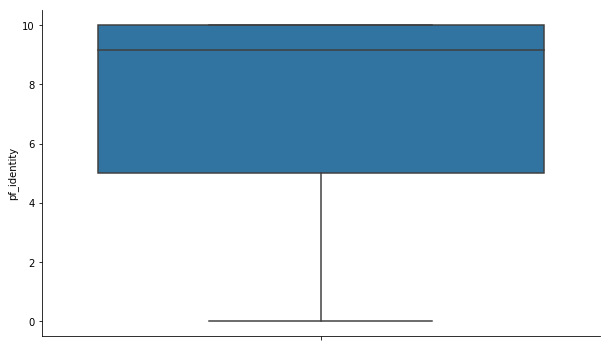

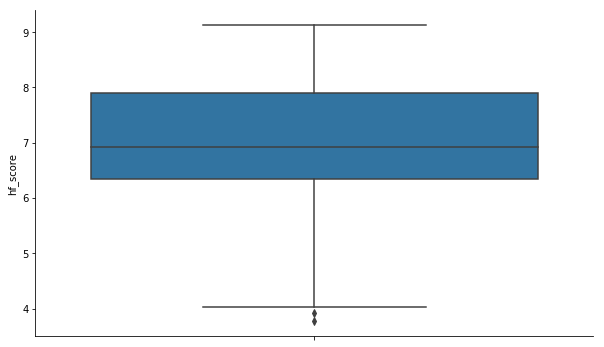

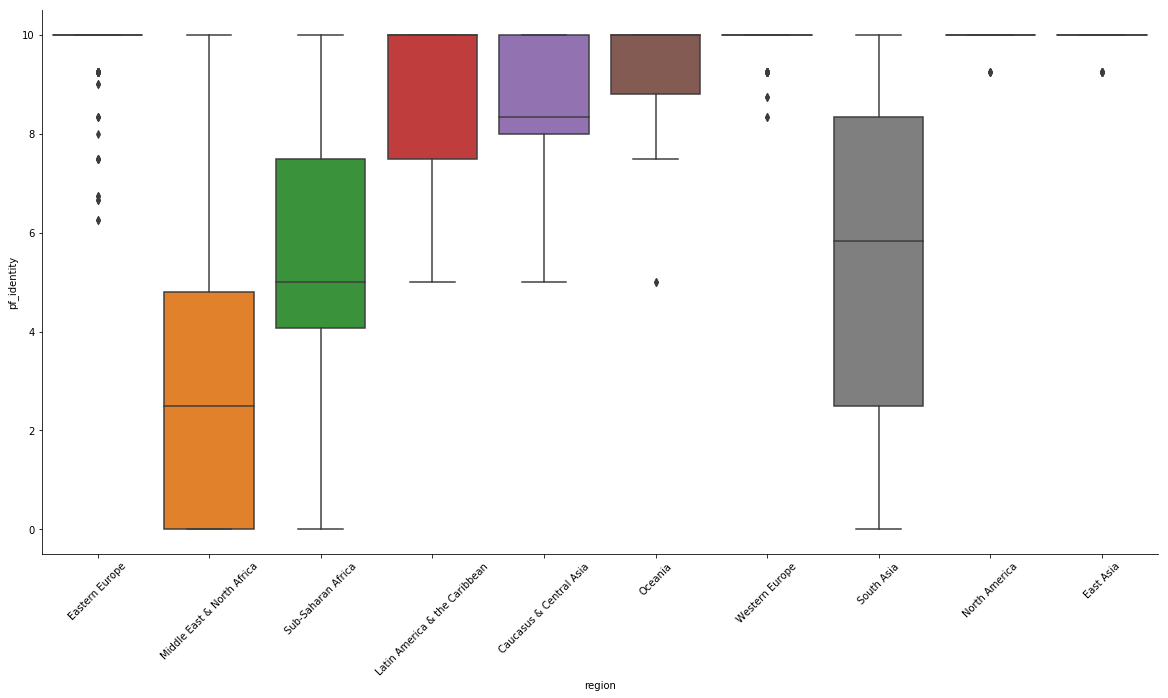

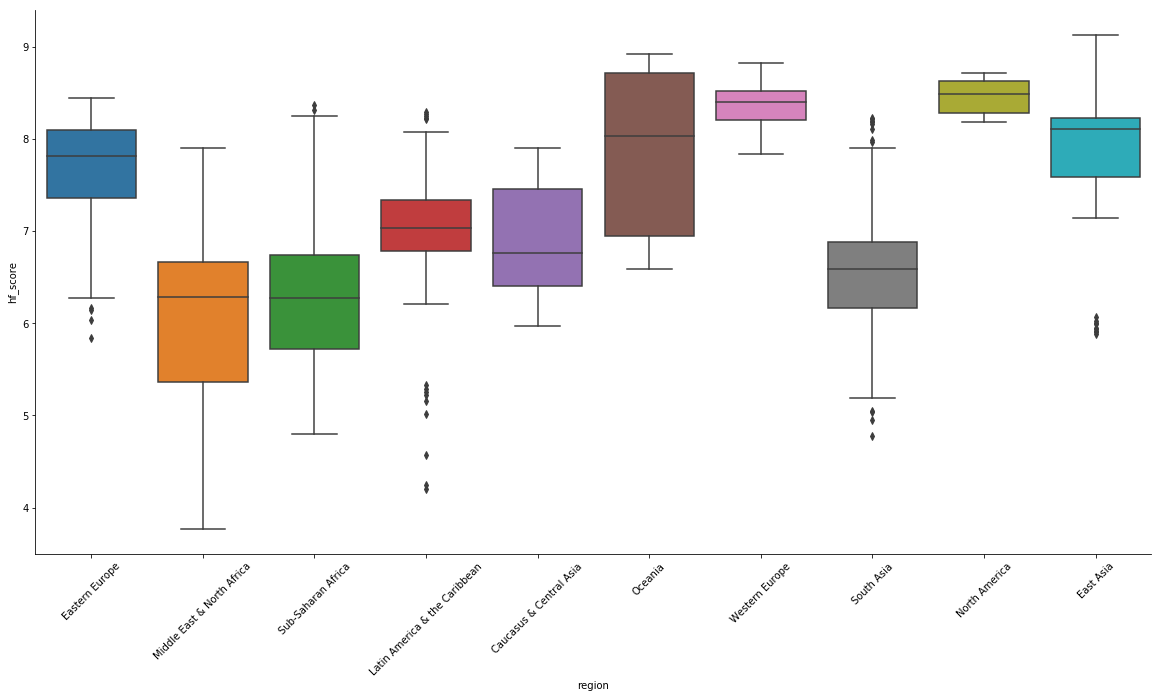

In [32]:
#¿Los outliers, son globales o por grupo?

#En el siguiente ejemplo muestra cómo podemos identificar outliers globales, ya que no le indicamos al gráfico que agrupe por una variable específica.

plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset, y='pf_identity')
seaborn.despine()

plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset, y='hf_score')
seaborn.despine()

#Por otra parte podemos definir grupos a través de los valores de una o más variables como en estos casos la región.

plt.figure(figsize=(20,10))
seaborn.boxplot(data=dataset, y='pf_identity', x='region')
plt.xticks(rotation=45)
seaborn.despine()

plt.figure(figsize=(20,10))
seaborn.boxplot(data=dataset, y='hf_score', x='region')
plt.xticks(rotation=45)
seaborn.despine()

##Si analizamos estos gráficos por grupos, para pf_identity podemos observar que los centros de distribución son totalmente diferentes entre si, como así también el tamaño de la población muestreada por región. El dato similar en todos los casos es el de los valores más altos, todos llegan a 10. Regiones como Europa oeste y occidente, Oceania,  este de Asia y Norteamerica presentan outliers.
##Para hf_score los centros de distribución ya tienden a estar más en medio, ninguno equivale a un valor superior de muestra. En este caso se destaca Latinoamerica por sus grandes outliers.

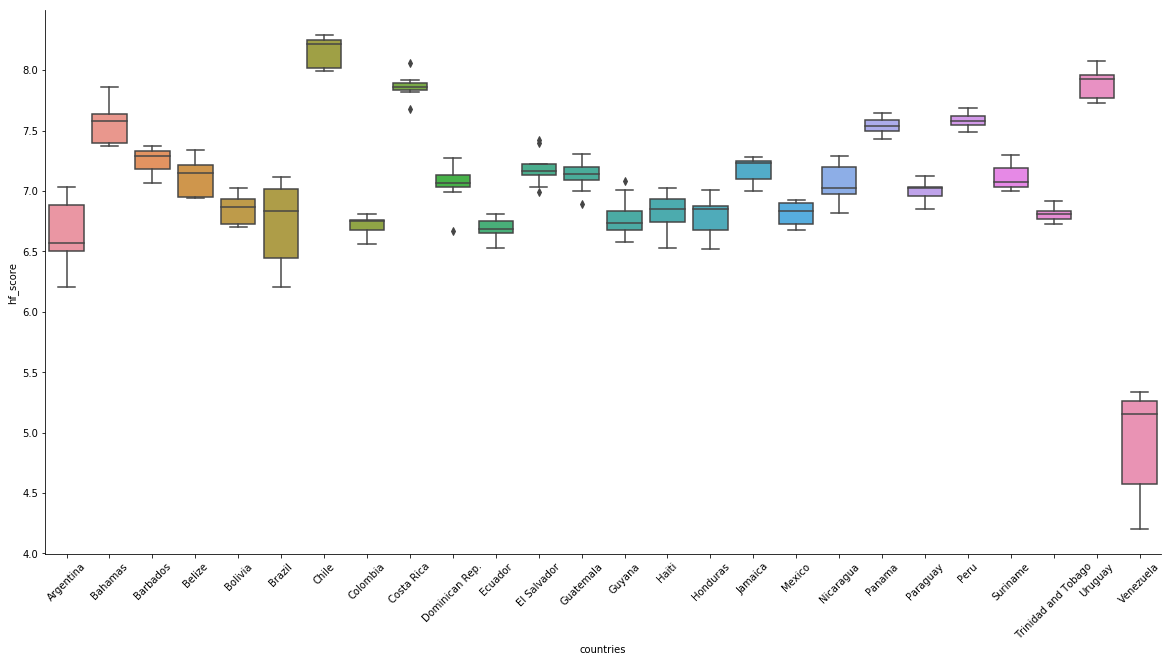

In [33]:
#¿Los eliminaría del conjunto de datos?

#No eliminaría los outliers en este caso donde la variable presenta una jerarquía y podría desglosar los valores en otros más pequeños como de Region a Pais, para poder visualizar realmente si el outlier es casual o si representa valores propios de un país en cuestión.
#En Latinoamerica es solo un pais el que genera estos outliers, las demás cajas presentan un comportamiento mucho más uniforme, con centros de distribución que rondan los 6,5 y 7,5. 

plt.figure(figsize=(20,10))
seaborn.boxplot(data=dataset_LAC , y='hf_score', x='countries')
plt.xticks(rotation=45)
seaborn.despine()

Desde [ 0.0 ] - Hasta [ 10.0 ]
Desde [ 3.765826877 ] - Hasta [ 9.126312939 ]


(3.765826877, 9.126312939)

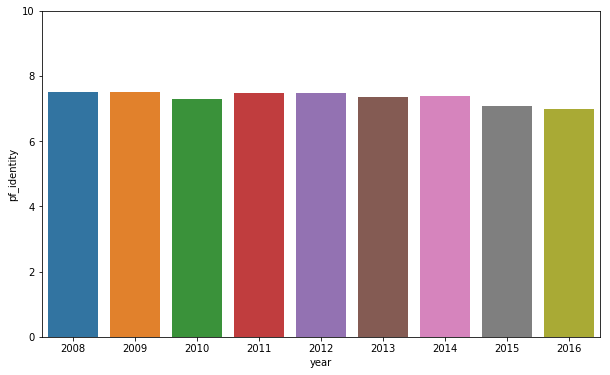

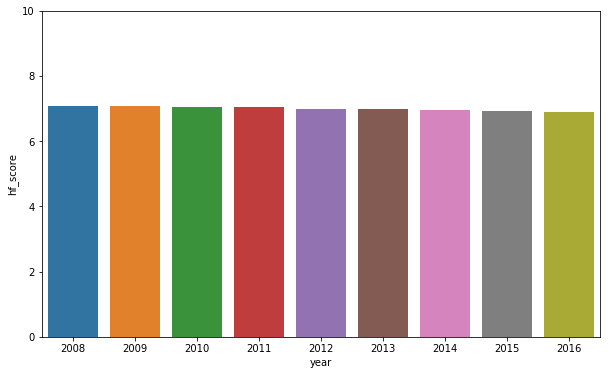

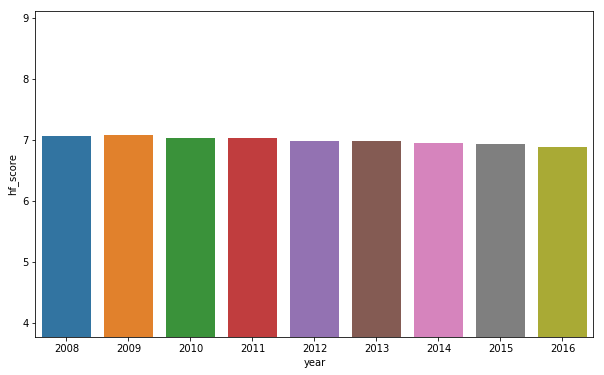

In [34]:
#2. Agregación de datos
#Grafiquen la media de la variable pf_identity y hf_score a través de los años.

media_anio_1=dataset.groupby('year', as_index=False).agg({"pf_identity": "mean"})
plt.figure(figsize=(10,6))
seaborn.barplot(data=media_anio_1, x='year', y='pf_identity')
plt.ylim(0, 10)
media_anio_2=dataset.groupby('year', as_index=False).agg({"hf_score": "mean"})
plt.figure(figsize=(10,6))
seaborn.barplot(data=media_anio_2, x='year', y='hf_score')
plt.ylim(0, 10)

#Se consideran los lìmites posibles de respuesta para definir plt.ylim ya que de este modo se permite observar que tan cerca o lejos está la altura de la barra de la mitad del gráfico, es decir que si la media ronda los valores intermedios posibles.
#Otra opción podría haber sido tomar el máx y mín valor respondido y comparar la media con este rango, permitiendo así saber si la media se aproxima a la mitad del gráfico (y por ende del rango de valores)

print('Desde [', dataset['pf_identity'].min(), ']', '-', 'Hasta [', dataset['pf_identity'].max(), ']')
print('Desde [', dataset['hf_score'].min(), ']', '-', 'Hasta [', dataset['hf_score'].max(), ']')

media_anio_2=dataset.groupby('year', as_index=False).agg({"hf_score": "mean"})
plt.figure(figsize=(10,6))
seaborn.barplot(data=media_anio_2, x='year', y='hf_score')
plt.ylim(dataset['hf_score'].min(), dataset['hf_score'].max())


(6, 8)

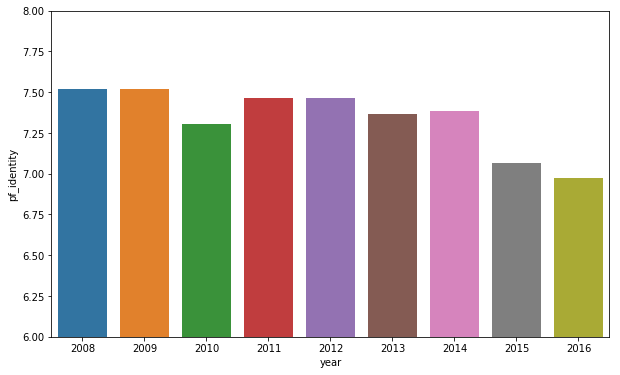

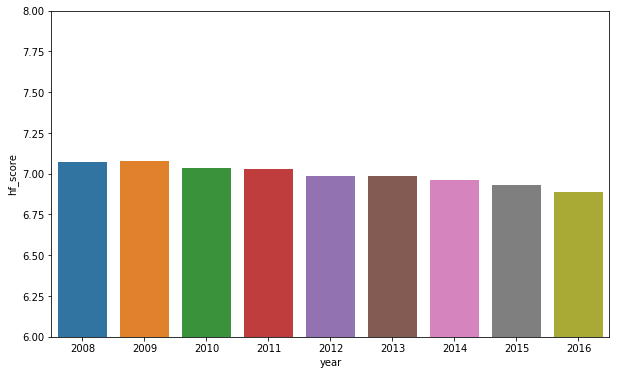

In [35]:
#Si quisiéramos entrar en detalle, y considerando que todos los valores en ambos casos van de 6 a 8, podríamos hacerle un zoop a ese rango y ver qué sucede año a año allí.
#Para pf_identity se nota una marcada baja a partir del 2015. Por ser a nivel mundial difícilmente pueda asociarse a un acontecimiento del tipo político, económico, catastrófico, podría repetirse este análisis por región/país y ver si esta característica se repite para algunas zonas particulares.

media_anio_1=dataset.groupby('year', as_index=False).agg({"pf_identity": "mean"})
plt.figure(figsize=(10,6))
seaborn.barplot(data=media_anio_1, x='year', y='pf_identity')
plt.ylim(6, 8)
media_anio_2=dataset.groupby('year', as_index=False).agg({"hf_score": "mean"})
plt.figure(figsize=(10,6))
seaborn.barplot(data=media_anio_2, x='year', y='hf_score')
plt.ylim(6, 8)

array(['2013-Costa Rica', '2013-Nicaragua', '2013-Peru',
       '2014-Costa Rica', '2014-Haiti', '2014-Nicaragua', '2014-Peru'],
      dtype='<U15')

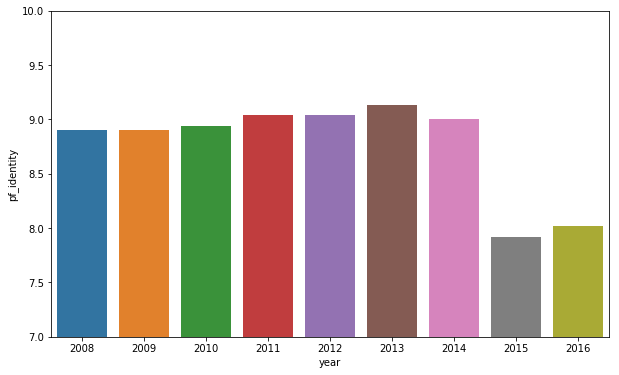

In [36]:
#Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?
#Hint: hay un gráfico de seaborn que hace todo por vos!

#Hay una importante baja en Latinoamerica en los años 2015/2016

media_anio_1=dataset_LAC.groupby('year', as_index=False).agg({"pf_identity": "mean"})
plt.figure(figsize=(10,6))
seaborn.barplot(data=media_anio_1, x='year', y='pf_identity')
plt.ylim(7, 10)

##El objetivo es averiguar cuáles países presentan un comportamiento similar. Para ello vamos analizando el comportamiento de cada pais año a año y tomamos como comportamiento similar si en el mismo año el pais y la region tuvieron una media de +- 0,25. 
##El resultado obtenido es un listado de años y países que tienen un comportamiento similar a Latinoamerica ese mismo año pero no existe en esta lista que se repita un mismo pais para todos los años en señal de que la gràfica serìa similar.

import pandas as pd
import numpy as np
paises_simil_distribucion = []
media_LAC=dataset_LAC.groupby('year', as_index=False).agg({"pf_identity": "mean"})
media_LAC_PAIS=dataset_LAC.groupby(['year', 'countries'], as_index=False).agg({"pf_identity": "mean"})
for col1 in media_LAC['year'].unique():
    for col2 in media_LAC_PAIS['countries'].unique():
        nro_media_LAC = media_LAC.loc[media_LAC['year'] == col1]['pf_identity']
        media_LAC_PAIS_2 = media_LAC_PAIS.loc[media_LAC_PAIS['year'] == col1]
        nro_media_PAIS = media_LAC_PAIS_2[media_LAC_PAIS_2['countries'] == col2]['pf_identity']
        nro_media_LAC_MAX = (nro_media_LAC + 0.25)
        nro_media_LAC_MIN = (nro_media_LAC - 0.25)
        if nro_media_LAC_MIN.item() < nro_media_PAIS.item() < nro_media_LAC_MAX.item():
            anio_pais = str(col1) + '-' + str(col2)
            paises_simil_distribucion.append(anio_pais)
paises_simil_distribucion_final = np.unique(paises_simil_distribucion)
paises_simil_distribucion_final


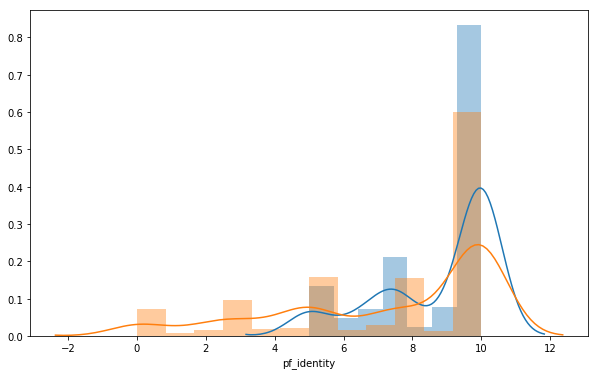

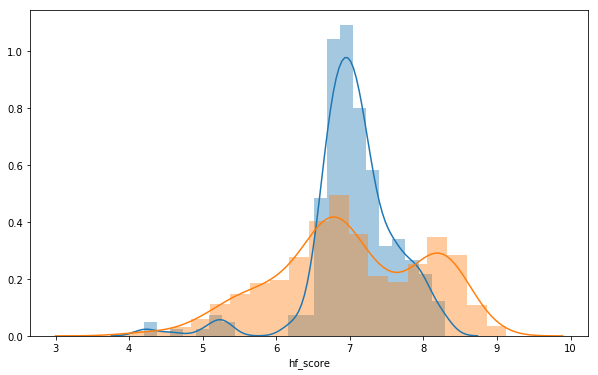

In [37]:
#2. Distribuciones
#Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?


dataset_LAC = dataset.loc[dataset['region'] == 'Latin America & the Caribbean']

plt.figure(figsize=(10,6))
seaborn.distplot(dataset_LAC['pf_identity'].dropna())
seaborn.distplot(dataset['pf_identity'].dropna())

plt.figure(figsize=(10,6))
seaborn.distplot(dataset_LAC['hf_score'].dropna())
seaborn.distplot(dataset['hf_score'].dropna())


In [38]:
#Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

from scipy import stats
import numpy as np

array_pf_identity = np.array(sorted(dataset['pf_identity']))
array_pf_identity = numpy.asarray([ h for h in array_pf_identity if not numpy.isnan(h) ])
print('Resultado test ks para pf_identity: ' + str(stats.kstest(array_pf_identity, 'norm')))

array_hf_score = np.array(sorted(dataset['hf_score']))
array_hf_score = numpy.asarray([ h for h in array_hf_score if not numpy.isnan(h) ])
print('Resultado test ks para hf_score: ' + str(stats.kstest(array_hf_score, 'norm')))

##Al obtener el pValue = 0.0 no podemos afirmar que pertenece a una distribucion normal



Resultado test ks para pf_identity: KstestResult(statistic=0.9146901895363428, pvalue=0.0)
Resultado test ks para hf_score: KstestResult(statistic=0.9999170006054449, pvalue=0.0)


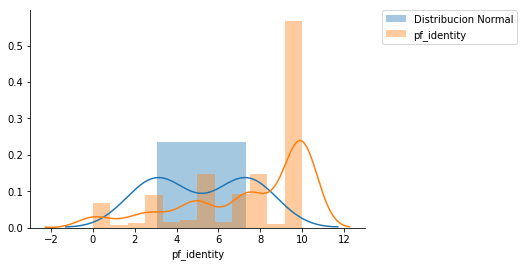

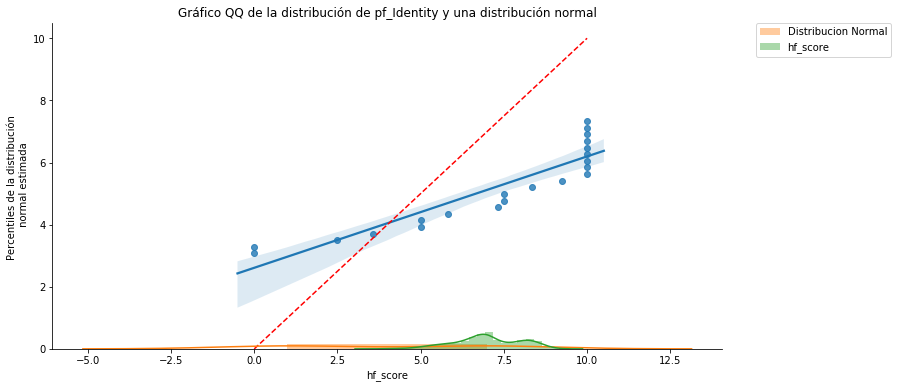

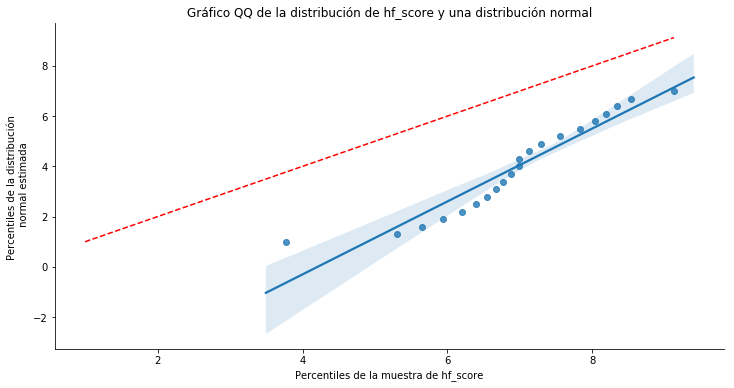

In [40]:
#Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.


##Primero para graficar cualquier cosa debemos preparar los datos, es decir, sanearlos si es necesario para luego evitar problemas al momento de graficar.
#Sanearemos los datos solo numericos, ya que son estos los que necesitamos graficar.


#Sanearemos los valores numericos que son con los valores de los indicadores que decearemos trabajar
dataset_numeric = dataset.select_dtypes(include=['number'])



for col in dataset_numeric:
    dataset_numeric= dataset_numeric.fillna(dataset_numeric.mean())
#Con las instrucciones anteriores saneamos los datos para la columna 'pf_identity'

##Primero definimos nuestra muestra con la que vamos a trabajar ya filtrando la variable deseada
datasetaux=dataset_numeric['pf_identity'].sort_index()

#Ahora igualamos nuestra Distribucion_Normal asignandole los valores de Media y Desviacion Estandar
norm_dist=datasetaux.mean(),datasetaux.std()

#Graficamos
#Primero le indicamos nuestra Distribucion Normal.
seaborn.distplot(norm_dist,label='Distribucion Normal')
#Segundo le indicamos la muestra de datos filtrada por la variable deseada.
seaborn.distplot(datasetaux, label='pf_identity')
#Tercero damos formato al grafico.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()
#Finalizamos ejecutando.




#Ahora podemos armar el gráfico QQ. Usamos dos muestras del mismo tamaño, y calculamos los cuartiles.
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(datasetaux, percs)
qn_norm_dist = numpy.percentile(norm_dist, percs)


plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_Identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_Identity y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='RED', ls="--")

seaborn.despine()

#Primero para graficar cualquier cosa debemos preparar los datos, es decir, sanearlos si es necesario para luego evitar problemas al momento de graficar.
#Sanearemos los datos solo numericos, ya que son estos los que necesitamos graficar.


#Sanearemos los valores numericos que son con los valores de los indicadores que decearemos trabajar
dataset_numeric = dataset.select_dtypes(include=['number'])



for col in dataset_numeric:
    dataset_numeric= dataset_numeric.fillna(dataset_numeric.mean())
#Con las instrucciones anteriores saneamos los datos para la columna 'hf_score'

##Primero definimos nuestra muestra con la que vamos a trabajar ya filtrando la variable deseada
datasetaux=dataset_numeric['hf_score'].sort_index()

#Ahora igualamos nuestra Distribucion_Normal asignandole los valores de Media y Desviacion Estandar
norm_dist=datasetaux.mean(),datasetaux.std()

#Graficamos
#Primero le indicamos nuestra Distribucion Normal.
seaborn.distplot(norm_dist,label='Distribucion Normal')
#Segundo le indicamos la muestra de datos filtrada por la variable deseada.
seaborn.distplot(datasetaux, label='hf_score')
#Tercero damos formato al grafico.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()
#Finalizamos ejecutando.




#Ahora podemos armar el gráfico QQ. Usamos dos muestras del mismo tamaño, y calculamos los cuartiles.
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(datasetaux, percs)
qn_norm_dist = numpy.percentile(norm_dist, percs)


plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de hf_score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='RED', ls="--")

seaborn.despine()


In [52]:
#Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

#Asimetría 
dataset_numeric['pf_identity'].skew(axis = 0, skipna = True) 
dataset_numeric['hf_score'].skew(axis = 0, skipna = True) 


#Curtosis 
dataset_numeric['pf_identity'].kurtosis(axis = 0)
dataset_numeric['hf_score'].kurtosis(axis = 0)

-0.36277464094523726

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


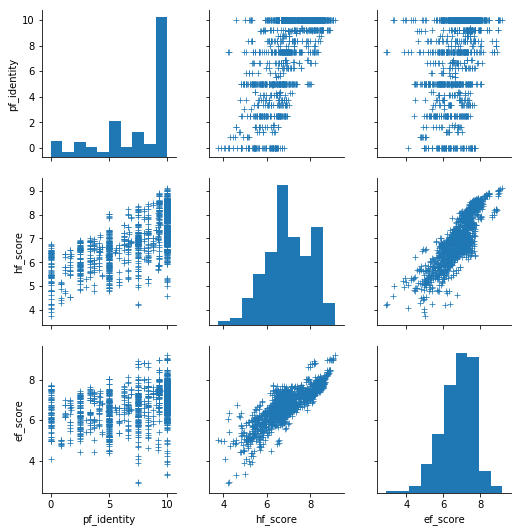

<Figure size 720x432 with 0 Axes>

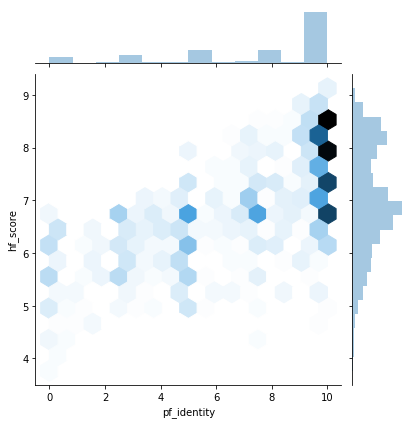

<Figure size 720x432 with 0 Axes>

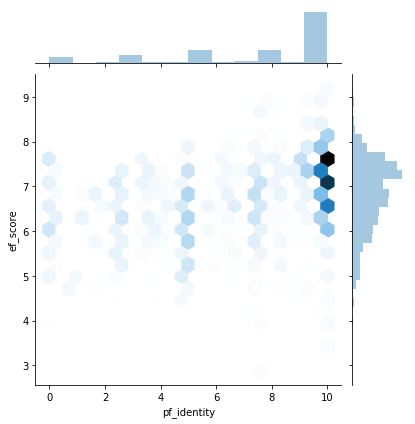

<Figure size 720x432 with 0 Axes>

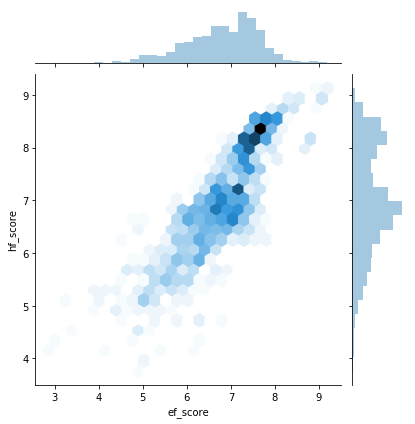

In [53]:
#3. Correlaciones
#En este ejercicio queremos responder a las preguntas

#Las libertades sociales y económicas, ¿van siempre de la mano?
#¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?
#Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score.
#Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación.

#¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

##Puede observarse que hf_score y ef_score tienen una correlación entre si, pudiendo observarse una relación lineal, no asi con pf_identity.

seaborn.pairplot(
    data=dataset,
    vars=['pf_identity', 'hf_score', 'ef_score'],
    markers='+')



#Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset,
                  x='pf_identity', y='hf_score', kind='hex')
plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset,
                  x='pf_identity', y='ef_score', kind='hex')

##No hay conclusiones visibles debido a que, como dijimos anteriormente, no hay correlación entre pf_identity y las demás variables. sin embargo si relacionamos el otro par de variables podemos llegar a la misma conclusión de correlación líneal del enunciado anterior.

plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset,
                  x='ef_score', y='hf_score', kind='hex')

In [54]:
#Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.

##Coeficiente de Pearson es el estadístico de correlación más utilizado para medir el grado de relación entre variables relacionadas linealmente, ambas deberían estar distribuidas normalmente.
##La correlación de rango de Kendall es una prueba no paramétrica que mide la fuerza de dependencia entre dos variables
##la correlación de rango de Spearman es una prueba no paramétrica que se utiliza para medir el grado de asociación entre dos variables. La prueba de correlación de rango de Spearman no incluye ninguna suposición sobre la distribución de los datos y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.

##Coeficiente de Spearman es una medida de la correlación entre dos variables, por lo tanto, dado el gráfico de abajo podemos observar que el coeficiente es de 0,68, lo cual significa que hay cierta correlación pero no tan marcada como con hf_score y ef_score donde da 0,86 para un p value de 0 (confianza de correlación), cuando en este gráfico p value da 2.3804640834918467e-192. indicando asi que no podemos rechazar que las variables no estén correlacionadas.

from scipy.stats import spearmanr
dataspearmanr = spearmanr(dataset['pf_identity'], dataset['hf_score'], nan_policy='omit')
dataspearmanr

SpearmanrResult(correlation=0.6861094212039192, pvalue=2.3804640834918467e-192)

In [55]:
#[Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable region es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)